In [1]:
using ConvDiff
using PyPlot
using jInv.Mesh
using jInv.ForwardShare
using jInv.InverseSolve
using jInvVis
using jInv.LinearSolvers
using MAT

# Generate test data for MIPDECO Problem

In this notebook, we generate the test data for the source inversion problem. We will use the FEM approach on a finer mesh than used for the inversion. Also, the measurement location will be off-grid points to make this example somewhat realistic.

## 2D Instances

The code below generates a 2D instance. We use a domain $[0,2]\times[0,1]$ and we read a model from the MAT file. We generate sources at randomly chosen locations in the domain.

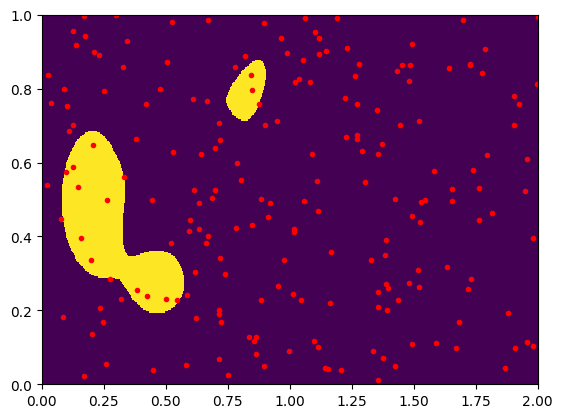

/Users/lruthot/Library/Python/2.7/lib/python/site-packages/matplotlib/pyplot.py:3242: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x131ffbc10>

In [2]:
# filename= "2DmodelLShaped.mat"
filename= "Peaks2D.mat"
file = matread(filename)
wtrue = vec(file["W"]) ## Sources on finest mesh
domain = file["domain"]
m      = file["m"]

M      = getRegularMesh(domain,m)
viewImage2D(wtrue,M,hold=true)

rec = rand(200,2) .*[domain[2] domain[4]]
plot(rec[:,1],rec[:,2],".r")


In [3]:
# build linear interpolation matrix from nodes to receiver locations
x1,x2 = getNodalAxes(M)
P = interpmat(x1,x2, rec);

# build param that holds forward problem
pFor = getConvDiffFEMParam(M,Ainv=getMUMPSsolver(),P=P);

dtrue, pFor = getData(vec(wtrue),pFor);
utrue = pFor.Fields

file["utrue"]  = reshape(utrue,M.n[1]+1,M.n[2]+1);
file["dtrue"]  = dtrue
file["rec"]    = rec
file["sig"]    = pFor.sig
file["v"]      = pFor.v

matwrite(filename,file)

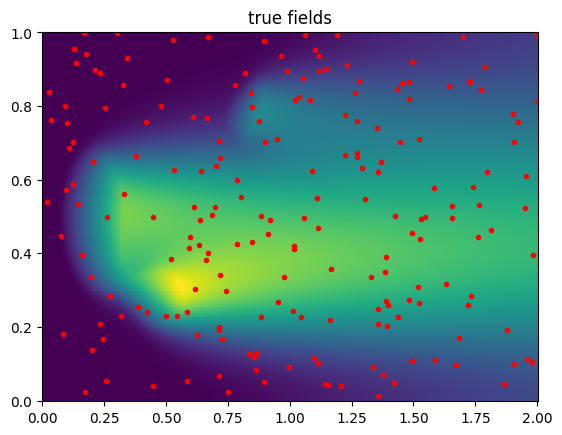

PyObject <matplotlib.text.Text object at 0x132d86b90>

In [4]:
viewImage2D(utrue,getPaddedMesh(M))
plot(rec[:,1],rec[:,2],".r")
title("true fields")